In [7]:
import numpy as np
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_csv("data/GOOGL.csv")
data["Date"] = data.index
data.reset_index(drop=True,inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,248,2272.050049,2280.000000,2244.820068,2278.350098,2278.350098,1160200
249,249,2275.399902,2288.879883,2240.320068,2252.520020,2252.520020,1207300
250,250,2267.000000,2306.120117,2261.250000,2299.929932,2299.929932,1453300
251,251,2304.520020,2324.530029,2297.320068,2309.929932,2309.929932,1595200
252,252,2317.632568,2317.632568,2286.159912,2290.979980,2290.979980,1756799


In [6]:
data = data[["Date","Close"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    int64  
 1   Close   253 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


[]

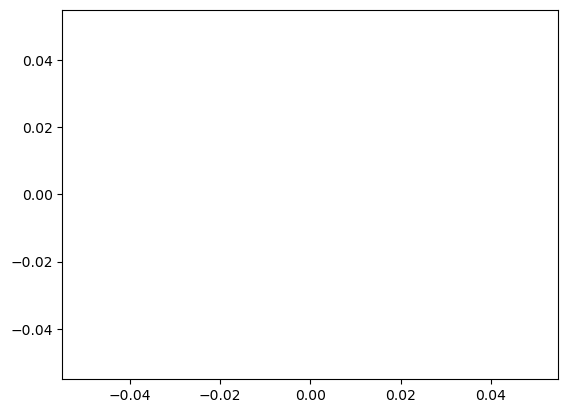

In [13]:
import matplotlib.pyplot as plt
plt.plot()

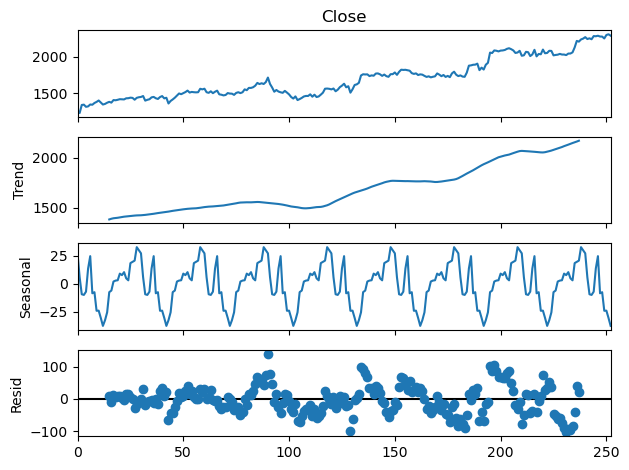

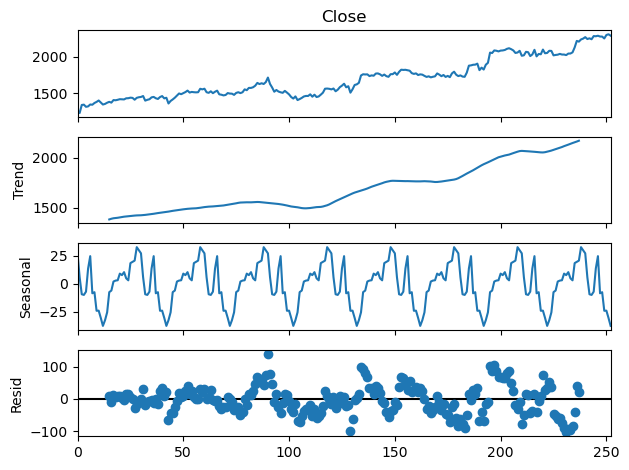

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], period=30)
result.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

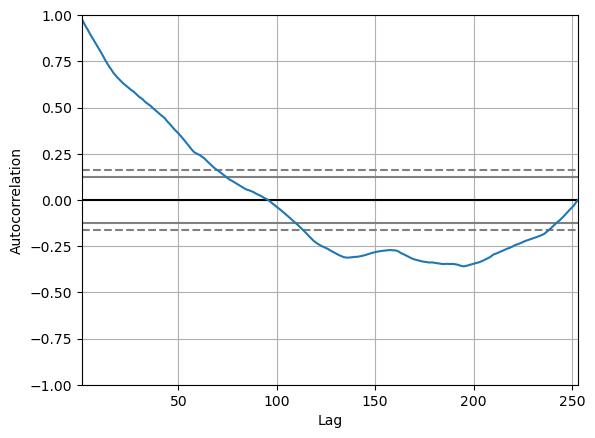

In [14]:
pd.plotting.autocorrelation_plot(data["Close"])

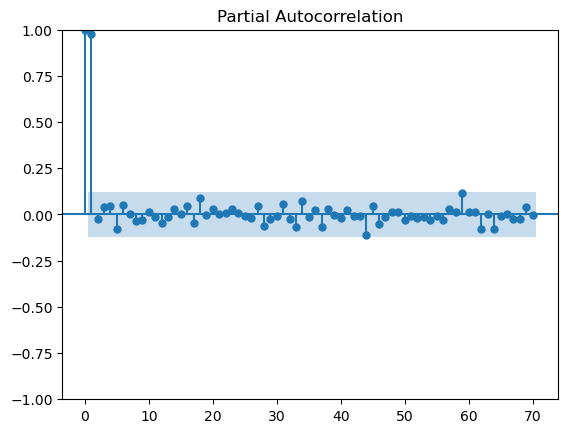

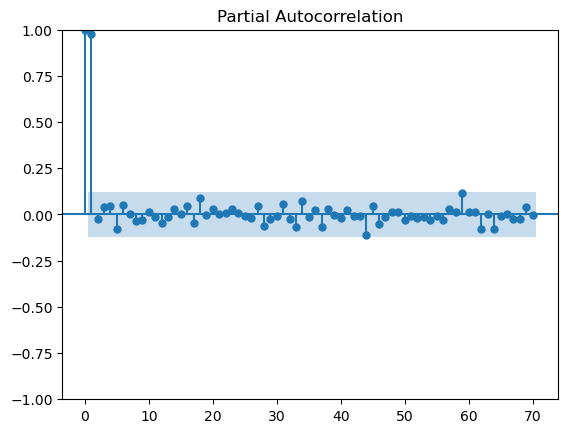

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags=70)

In [25]:
p,d,q = 5,1,2
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
predicts = fitted.predict(len(data),len(data)+10)
predicts

253    2289.338553
254    2295.209370
255    2289.088296
256    2281.176607
257    2285.965150
258    2291.601874
259    2289.031316
260    2286.252374
261    2288.803133
262    2290.229472
263    2288.036409
Name: predicted_mean, dtype: float64

<Axes: >

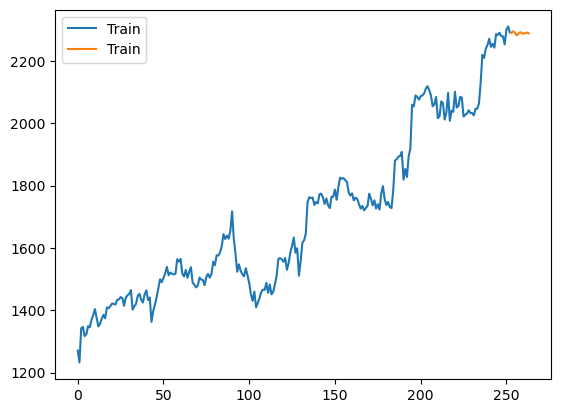

In [26]:
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="Train")

C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

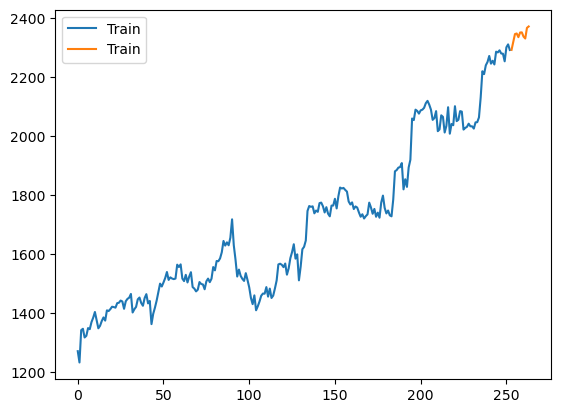

In [30]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(data["Close"], order=(p,d,q), seasonal_order=(p,d,q,12))
fitted = model.fit()
predicts = fitted.predict(len(data),len(data)+10)
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="Train")